Reading the data set using pandas

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv('gsuite.csv')

Here head retrieves the first 10 of the data set

In [22]:
df.head(10)

,time,metric_name,metric_value
0,2015-03-23T00:00:00.000-0400,google.accounts:apps_total_licenses,0
1,2015-03-23T00:00:00.000-0400,google.accounts:apps_used_licenses,0
2,2015-03-23T00:00:00.000-0400,google.accounts:authorized_apps,0
3,2015-03-23T00:00:00.000-0400,google.accounts:coordinate_total_licenses,0
4,2015-03-23T00:00:00.000-0400,google.accounts:drive_used_quota_in_mb,9537833
5,2015-03-23T00:00:00.000-0400,google.accounts:gmail_used_quota_in_mb,29158045
6,2015-03-23T00:00:00.000-0400,google.accounts:gplus_photos_used_quota_in_mb,659544
7,2015-03-23T00:00:00.000-0400,google.accounts:num_1day_logins,16814
8,2015-03-23T00:00:00.000-0400,google.accounts:num_30day_logins,24022
9,2015-03-23T00:00:00.000-0400,google.accounts:num_7day_logins,21763


Tail gives the last 5 rows in the data set

In [5]:
df.tail()

,time,metric_name,metric_value
611908,2019-08-17T00:00:00.000-0400,google.meet:total_call_minutes_unknown_client,0
611909,2019-08-17T00:00:00.000-0400,google.meet:total_call_minutes_web,0
611910,2019-08-17T00:00:00.000-0400,google.meet:total_meeting_minutes,0
611911,2019-08-17T00:00:00.000-0400,google.sites:num_sites,11130
611912,2019-08-17T00:00:00.000-0400,google.sites:num_sites_created,0


size gives the total data points rows * columns

In [6]:
df.size

1835739

Shape gives the dimensionality of the data set.

In [7]:
df.shape

(611913, 3)

columns gives us the index names and the data type

In [8]:
df.columns

Index(['time', 'metric_name', 'metric_value'], dtype='object')

In [55]:
df['metric_name'].head()

0          google.accounts:apps_total_licenses
1           google.accounts:apps_used_licenses
2              google.accounts:authorized_apps
3    google.accounts:coordinate_total_licenses
4       google.accounts:drive_used_quota_in_mb
Name: metric_name, dtype: object

Gives the two columns metric_name and metric_value.

In [54]:
df[['metric_name','metric_value']].head()

,metric_name,metric_value
0,google.accounts:apps_total_licenses,0
1,google.accounts:apps_used_licenses,0
2,google.accounts:authorized_apps,0
3,google.accounts:coordinate_total_licenses,0
4,google.accounts:drive_used_quota_in_mb,9537833


Sorting the values of a column metric_values

In [53]:
df.sort_values(['metric_value']).head()

,time,metric_name,metric_value
214008,2017-05-18 04:00:00,google.drive:num_owned_items_with_visibility_p...,-376732
214021,2017-05-18 04:00:00,google.drive:num_owned_other_types_delta,-375495
213993,2017-05-18 04:00:00,google.drive:num_owned_items_delta,-374954
213561,2017-05-17 04:00:00,google.drive:num_owned_items_with_visibility_p...,-195240
562716,2019-05-08 04:00:00,google.drive:num_owned_items_with_visibility_p...,-185944


Retreiving data set with negative values for number of users. We can drop the negative data values for the users

In [51]:
df.loc[(df.metric_value < 0)].head()

,time,metric_name,metric_value
25,2015-03-23 04:00:00,google.accounts:total_quota_in_mb,-63989
274,2015-03-24 04:00:00,google.accounts:total_quota_in_mb,-64049
523,2015-03-25 04:00:00,google.accounts:total_quota_in_mb,-64115
772,2015-03-26 04:00:00,google.accounts:total_quota_in_mb,-64154
1021,2015-03-27 04:00:00,google.accounts:total_quota_in_mb,-64174


Dropping the rows with negative for metric_vlaues

In [ ]:
df.loc[(df.metric_value < 0)].dropna()

No of values for a particular data, it is like how many times a particular metric_name is repeated. It is sorted by value.

In [50]:
metric_names_counts= df['metric_name'].value_counts()
metric_names_counts.head()

google.docs:num_1day_active_users               1585
google.gmail:num_outbound_unencrypted_emails    1584
google.gmail:num_inbound_non_spam_emails        1584
google.gmail:num_outbound_rerouted_emails       1584
google.gmail:num_inbound_rejected_emails        1584
Name: metric_name, dtype: int64

In [ ]:
sorting the metric_names based on index

In [63]:
metric_names_counts= df['metric_name'].value_counts().sort_index()
metric_names_counts.head()

google._empty_                                593
google.accounts:apps_total_licenses          1161
google.accounts:apps_used_licenses           1161
google.accounts:authorized_apps              1542
google.accounts:coordinate_total_licenses    1161
Name: metric_name, dtype: int64

Finding the metric values with a zero users.

In [49]:
zero_users = df[df.metric_value==0]
zero_users.head()

,time,metric_name,metric_value
0,2015-03-23 04:00:00,google.accounts:apps_total_licenses,0
1,2015-03-23 04:00:00,google.accounts:apps_used_licenses,0
2,2015-03-23 04:00:00,google.accounts:authorized_apps,0
3,2015-03-23 04:00:00,google.accounts:coordinate_total_licenses,0
17,2015-03-23 04:00:00,google.accounts:num_users_2sv_enforced,0


Metric with maximum number of user

In [15]:
df.metric_value.max()

274032962

Finding all the rows in a dataset with a particular metric_name

In [48]:
df.loc[df['metric_name'] =='google.accounts:authorized_apps'].head()


,time,metric_name,metric_value
2,2015-03-23 04:00:00,google.accounts:authorized_apps,0
251,2015-03-24 04:00:00,google.accounts:authorized_apps,0
500,2015-03-25 04:00:00,google.accounts:authorized_apps,0
749,2015-03-26 04:00:00,google.accounts:authorized_apps,0
998,2015-03-27 04:00:00,google.accounts:authorized_apps,0


Grouping the rows by a metric_name

In [ ]:
for g in df.groupby(['metric_name']):
    print(g)

In [ ]:
To find all the metric at has atleast one user

In [46]:

df[(df['metric_value']>0)].head()

,time,metric_name,metric_value
4,2015-03-23 04:00:00,google.accounts:drive_used_quota_in_mb,9537833
5,2015-03-23 04:00:00,google.accounts:gmail_used_quota_in_mb,29158045
6,2015-03-23 04:00:00,google.accounts:gplus_photos_used_quota_in_mb,659544
7,2015-03-23 04:00:00,google.accounts:num_1day_logins,16814
8,2015-03-23 04:00:00,google.accounts:num_30day_logins,24022


In [ ]:
Finding all the metrics which has greater than a 1000 users

In [45]:
df[(df['metric_value']>1000)].head()

,time,metric_name,metric_value
4,2015-03-23 04:00:00,google.accounts:drive_used_quota_in_mb,9537833
5,2015-03-23 04:00:00,google.accounts:gmail_used_quota_in_mb,29158045
6,2015-03-23 04:00:00,google.accounts:gplus_photos_used_quota_in_mb,659544
7,2015-03-23 04:00:00,google.accounts:num_1day_logins,16814
8,2015-03-23 04:00:00,google.accounts:num_30day_logins,24022


Analysis using Date/Time data type
dtypes gives the data types in the data set

In [31]:
df.dtypes

time            object
metric_name     object
metric_value     int64
dtype: object

Changing time object to pandas datatime data type

In [33]:
df['time']= pd.to_datetime(df.time)

In [35]:
df.dtypes

time            datetime64[ns]
metric_name             object
metric_value             int64
dtype: object

In [36]:
df.head()

,time,metric_name,metric_value
0,2015-03-23 04:00:00,google.accounts:apps_total_licenses,0
1,2015-03-23 04:00:00,google.accounts:apps_used_licenses,0
2,2015-03-23 04:00:00,google.accounts:authorized_apps,0
3,2015-03-23 04:00:00,google.accounts:coordinate_total_licenses,0
4,2015-03-23 04:00:00,google.accounts:drive_used_quota_in_mb,9537833


In [59]:
# Different ways we can use the datatime functionalities in pandas
df.time.dt.weekday_name #prints the days of the week for time column
df.time.dt.dayofyear  # prints which of the year is it for the entire time column

# Retrieving columns after a particular date

timestamp= pd.to_datetime('07/19/2019')
df.loc[df.time>= timestamp,:].head()




,time,metric_name,metric_value
597046,2019-07-19 04:00:00,google.accounts:authorized_apps,0
597047,2019-07-19 04:00:00,google.accounts:drive_used_quota_in_mb,175724121
597048,2019-07-19 04:00:00,google.accounts:gmail_used_quota_in_mb,89342759
597049,2019-07-19 04:00:00,google.accounts:gplus_photos_used_quota_in_mb,2818742
597050,2019-07-19 04:00:00,google.accounts:num_1day_logins,3017


In [61]:
df.time.max()-df.time.min()

Timedelta('1608 days 00:00:00')

In [73]:
df['month']= df.time.dt.month

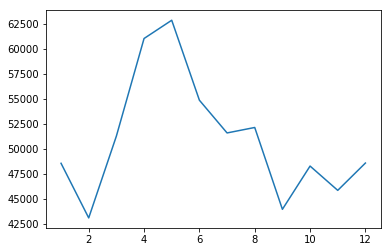

In [74]:
df.month.value_counts().sort_index().plot()

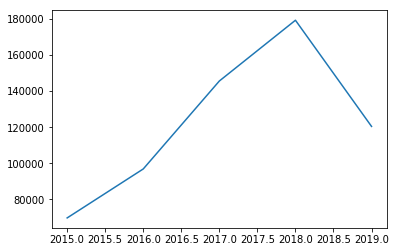

In [76]:
df['year']= df.time.dt.year
df.year.value_counts().sort_index().plot()